In [1]:
%%capture
import keras
import keras.backend as K
from keras.models import Model
from keras.layers import Input, Dense, Conv2D, Conv3D, DepthwiseConv2D, SeparableConv2D, Conv3DTranspose
from keras.layers import Flatten, MaxPool2D, AvgPool2D, GlobalAvgPool2D, UpSampling2D, BatchNormalization
from keras.layers import Concatenate, Add, Dropout, ReLU, Lambda, Activation, LeakyReLU, PReLU
from keras.utils import np_utils
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.optimizers import SGD
from time import time
from keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
from keras.callbacks import Callback
from keras.utils import multi_gpu_model

import numpy as np
import pandas as pd
import matplotlib, os, math


from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from sklearn.metrics import confusion_matrix
from keras.applications.vgg16 import VGG16
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

os.environ["CUDA_VISIBLE_DEVICES"]="0,1"

### 1.Prepare data

In [9]:
from time import time
import numpy as np

start_time = time()

X_train = np.load('/home/zxt/data/final_22/224/2k/X_train.npy')
X_validate = np.load('/home/zxt/data/final_22/224/2k/X_validate.npy')


X_test = np.load('/home/zxt/data/final_22/224/2k/X_test.npy')

print('Loading labels...')
Y_train = np.load('/home/zxt/data/final_22/224/2k/Y_train.npy')
Y_validate = np.load('/home/zxt/data/final_22/224/2k/Y_validate.npy')
Y_test = np.load('/home/zxt/data/final_22/224/2k/Y_test.npy')

end_time = time()
print('Running time: %s seconds'%(end_time - start_time))

Loading labels...
Running time: 432.14591431617737 seconds


In [10]:
len(X_train)

35200

In [11]:
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_validate.shape[0], 'validate samples')
print(X_test.shape[0], 'test samples')

X_train shape: (35200, 224, 224, 3)
35200 train samples
4400 validate samples
4400 test samples


In [12]:
X_train /=255.
X_validate /=  255.
X_test /= 255.

In [13]:
# Y_train label
for i in Y_train:
    if i[0]=='elephant':
        i[0]=0
    if i[0]=='wild_boar':
        i[0]=1
    if i[0]=='gazellethomosons':
        i[0]=2
    if i[0]=='squirrel':
        i[0]=3 
    if i[0]=='hedgehog':
        i[0]=4
    if i[0]=='guineafowl':
        i[0]=5
    if i[0]=='moose':
        i[0]=6
    if i[0]=='coyote':
        i[0]=7   
    if i[0]=='bird':
        i[0]=8
    if i[0]=='fox':
        i[0]=9
    if i[0]=='giraffe':
        i[0]=10
    if i[0]=='buffalo':
        i[0]=11
    if i[0]=='hare':
        i[0]=12
    if i[0]=='vehicle':
        i[0]=13
    if i[0]=='wildebeest':
        i[0]=14
    if i[0]=='cattle':
        i[0]=15 
    if i[0]=='skunk':
        i[0]=16
    if i[0]=='lion':
        i[0]=17
    if i[0]=='zebra':
        i[0]=18
    if i[0]=='black_bear':
        i[0]=19
    if i[0]=='racoon':
        i[0]=20
    if i[0]=='empty':
        i[0]=21
        
for i in Y_validate:
    if i[0]=='elephant':
        i[0]=0
    if i[0]=='wild_boar':
        i[0]=1
    if i[0]=='gazellethomosons':
        i[0]=2
    if i[0]=='squirrel':
        i[0]=3 
    if i[0]=='hedgehog':
        i[0]=4
    if i[0]=='guineafowl':
        i[0]=5
    if i[0]=='moose':
        i[0]=6
    if i[0]=='coyote':
        i[0]=7   
    if i[0]=='bird':
        i[0]=8
    if i[0]=='fox':
        i[0]=9
    if i[0]=='giraffe':
        i[0]=10
    if i[0]=='buffalo':
        i[0]=11
    if i[0]=='hare':
        i[0]=12
    if i[0]=='vehicle':
        i[0]=13
    if i[0]=='wildebeest':
        i[0]=14
    if i[0]=='cattle':
        i[0]=15 
    if i[0]=='skunk':
        i[0]=16
    if i[0]=='lion':
        i[0]=17
    if i[0]=='zebra':
        i[0]=18
    if i[0]=='black_bear':
        i[0]=19
    if i[0]=='racoon':
        i[0]=20
    if i[0]=='empty':
        i[0]=21

for i in Y_test:
    if i[0]=='elephant':
        i[0]=0
    if i[0]=='wild_boar':
        i[0]=1
    if i[0]=='gazellethomosons':
        i[0]=2
    if i[0]=='squirrel':
        i[0]=3 
    if i[0]=='hedgehog':
        i[0]=4
    if i[0]=='guineafowl':
        i[0]=5
    if i[0]=='moose':
        i[0]=6
    if i[0]=='coyote':
        i[0]=7   
    if i[0]=='bird':
        i[0]=8
    if i[0]=='fox':
        i[0]=9
    if i[0]=='giraffe':
        i[0]=10
    if i[0]=='buffalo':
        i[0]=11
    if i[0]=='hare':
        i[0]=12
    if i[0]=='vehicle':
        i[0]=13
    if i[0]=='wildebeest':
        i[0]=14
    if i[0]=='cattle':
        i[0]=15 
    if i[0]=='skunk':
        i[0]=16
    if i[0]=='lion':
        i[0]=17
    if i[0]=='zebra':
        i[0]=18
    if i[0]=='black_bear':
        i[0]=19
    if i[0]=='racoon':
        i[0]=20
    if i[0]=='empty':
        i[0]=21

In [14]:
from keras.utils import np_utils
y_train=np_utils.to_categorical(Y_train,22)
y_valid=np_utils.to_categorical(Y_validate,22)
y_test=np_utils.to_categorical(Y_test,22)

In [15]:
# check up the one-hot encoder
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

### 2.Modeling

In [16]:
num_train_samples = len(Y_train)
num_val_samples = len(Y_validate)
batch_size = 128
epochs = 20
num_classes = 22
input_shape = 224,224,3


learning_rate = 0.01
decay_rate = learning_rate / epochs
momentum = 0.8
sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)


# prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1)

In [19]:
start_time = time()

print('[INFO] initializing model......')
base_model=VGG16(weights='imagenet',include_top=False,input_tensor=Input(shape=(224,224,3)))
head_model=base_model.output
head_model=Flatten(name="flatten")(head_model)
head_model = Dense(512, activation="relu")(head_model)
head_model = Dropout(0.5)(head_model)
head_model=Dense(64,activation='relu')(head_model)
head_model = Dense(22, activation="softmax")(head_model)
model=Model(base_model.input,head_model)

for layer in base_model.layers:
    layer.trainable=False
print('[INFO] compiling model')
# sgd=SGD(lr=0.01,momentum=0.9)
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer=sgd)
print('[INFO] training model')
hist=model.fit(X_train, y_train, batch_size=batch_size , epochs=epochs, validation_data=(X_validate,y_valid))
print('[INFO] saving model and weights')
model_json=model.to_json()
open('model_architecture.json','w').write(model_json)

# model.save_weights('/home/zxt/code/final/5k_new/model/model_5k_vgg_1_weights.h5', overwrite=True)
# model.save('/home/zxt/code/final/5k_new/model/model_5k_vgg_1.h5')


end_time = time()
print("Running time: %s seconds"%(end_time - start_time))

[INFO] initializing model......
[INFO] compiling model
[INFO] training model
Train on 35200 samples, validate on 4400 samples
Epoch 1/20
35200/35200 [==============================] - 406s 12ms/step - loss: 2.3057 - accuracy: 0.2398 - val_loss: 1.6926 - val_accuracy: 0.4189
Epoch 2/20
35200/35200 [==============================] - 381s 11ms/step - loss: 1.8149 - accuracy: 0.3563 - val_loss: 1.4611 - val_accuracy: 0.4775
Epoch 3/20
35200/35200 [==============================] - 381s 11ms/step - loss: 1.6663 - accuracy: 0.4069 - val_loss: 1.4080 - val_accuracy: 0.5400
Epoch 4/20
35200/35200 [==============================] - 382s 11ms/step - loss: 1.6088 - accuracy: 0.4303 - val_loss: 1.3746 - val_accuracy: 0.5159
Epoch 5/20
35200/35200 [==============================] - 381s 11ms/step - loss: 1.5556 - accuracy: 0.4503 - val_loss: 1.3380 - val_accuracy: 0.5500
Epoch 6/20
35200/35200 [==============================] - 380s 11ms/step - loss: 1.5206 - accuracy: 0.4604 - val_loss: 1.2235 - v

In [20]:
history_df = pd.DataFrame(hist.history)

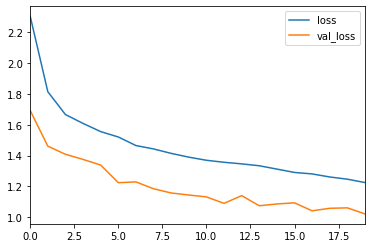

In [21]:
history_df[['loss', 'val_loss']].plot()

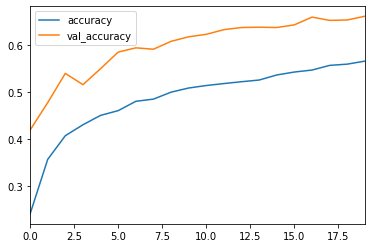

In [22]:
history_df[['accuracy', 'val_accuracy']].plot()

In [38]:
model.save('/home/zxt/data/final_22/model/224_2k/cnn_baseline.h5')
model.save('/home/zxt/data/final_22/model/224_2k/cnn_baseline_weights.h5')

OSError: Unable to create file (unable to open file: name = '/home/zxt/data/model/21category/vgg_basic_5k_224_model_5epoch.h5', errno = 2, error message = 'No such file or directory', flags = 13, o_flags = 242)

### 4.Evaluation

In [32]:
history_df = pd.DataFrame(hist.history)
history_df[['loss', 'val_loss']].plot()
history_df[['accuracy', 'val_accuracy']].plot()

### 5.Prediction on X_test dataset

In [33]:
loss,accuracy = model.evaluate(X_test,y_test)
print('\ntest loss',loss)
print('accuracy',accuracy)

4400/4400 [==============================] - 3s 580us/step

test loss 1.3659537623145364
accuracy 0.5372727513313293


In [ ]:
y_pred = model.predict(X_test,batch_size=1)

In [ ]:
y_pred

### 6.Check each categoryaccuracy

In [ ]:
a = list(y_pred)
y_prediction=[]
for i in a:
    j =list(i)
    y_prediction.append(j.index(max(j)))

In [ ]:
y_prediction[:5]

In [ ]:
Y_test[:5]

In [ ]:
# array to dataframe
y_real=pd.DataFrame(Y_test,columns=['label'])

In [ ]:
y_real.head(2)

In [ ]:
y_predict = pd.DataFrame(y_prediction,columns=['label_pre'])

In [ ]:

y_predict.head(2)

In [ ]:
prediction_df = pd.concat([y_real,y_predict],axis=1)
prediction_df['label']=prediction_df['label'].astype(int)
prediction_df['diff']=prediction_df['label']-prediction_df['label_pre']


In [ ]:
prediction_df

In [ ]:
prediction_df.to_csv(r'/home/zxt/data/results/prediction_df.csv',index=False)

In [ ]:
onehot_keylist = ['elephant','wild_boar','gazellethomosons','squirrel','hedgehog','guineafowl','moose','coyote','bird',
                  'fox','giraffe','buffalo','hare','vehicle','wildebeest','cattle','skunk','lion','zebra','black_bear',
                  'racoon']
onehot_dict = {'elephant':0,'wild_boar':1,'gazellethomosons':2,'squirrel':3,'hedgehog':4,'guineafowl':5,'moose':6,'coyote':7,
              'bird':8,'fox':9,'giraffe':10,'buffalo':11,'hare':12,'vehicle':13,'wildebeest':14,'cattle':15,'skunk':16,'lion':17,
              'zebra':18,'black_bear':19,'racoon':20}

for animal in onehot_keylist:
    name = animal
    animal = prediction_df[prediction_df['label']== onehot_dict[animal]]
    acc = animal.loc[:,'diff'].value_counts()[0]/len(animal)
    print("%s acc: %10.3f" %(name,acc) )